In [157]:
from scipy.io import loadmat
from scipy import signal
import numpy as np
import json
import matplotlib.pyplot as plt
#!pip install tqdm
from tqdm import tqdm_notebook as tqdm #if running in a notebook
#from tqdm import tqdm as tqdm #if not running in a notebook
from scipy.stats.stats import pearsonr

# Made by:
# Name			Studentnumber
# Niels van den Hork s4572602
# Niels van Drueten	s4496604

In [3]:
# Boolean to load correlation from file.
get_correlation_from_file = False

# Filename to store/load correlation matrix.
filename = "correlations.json"


# PRESENT Cipher SBox
SBox = [0xC, 0x5, 0x6, 0xB, 0x9, 0x0, 0xA, 0xD, 0x3, 0xE, 0xF, 0x8, 0x4, 0x7, 0x1, 0x2]


In [32]:
# Function f is the intermediate result,
# where _in is the known non-constant data value
# and k is a small part of the key.
def f(i, k):
	return SBox[i ^ k]

# Returns the Hamming Weight of val.
def hw(val):
	return bin(val).count("1")


In [5]:
# Returns a Value-Prediction Matrix of size [no_inputs x no_keys]
# Input _in: Input matrix variable of size [no_inputs]
def construct_val_pred_matrix(_in, key_len):
	output = np.zeros((len(_in), 2**key_len), dtype="uint8")
	for i in range(len(_in)):
		in_elem = _in[i][0]
		for k in range(2**key_len):
			val = f(in_elem,k)
			output[i][k] = val
	return output	

# Returns a Power-Prediction Matrix of size [no_inputs x no_keys]
# Input _in: Value-Prediction Matrix of size [no_inputs x no_keys]
def construct_pow_pred_matrix(val_pred_matrix, key_len):
	output = np.zeros((len(_in), 2**key_len), dtype="uint8")
	for i in range(len(_in)):
		in_elem = _in[i][0]
		for k in range(2**key_len):
			val = val_pred_matrix[i][k]
			output[i][k] = hw(val)
	return output

In [155]:
# Uses the correlate function of the scipy io library,
# that cross-correlates two matrices.



def correlate_m(matrix1, matrix2):
    print(matrix1.shape,matrix2.shape)
   
    cols_matrix1 = matrix1.shape[1]
    cols_matrix2 = matrix2.shape[1]
    
    vmax = -1e10 #max correlation value
    cmax = (-1,-1) # coordinate indices with max correlation
    
    
    result = np.zeros((cols_matrix1,cols_matrix2)) # sneller, want geen appends
    for i in tqdm(range(cols_matrix1)):
        for j in range(cols_matrix2):
            #result[i][j] = signal.correlate(matrix1[:,[i]], matrix2[:,[j]])[0] # dit is correlation als in convolution, niet pearson correlation
            #print(result[i][j])
            result[i][j] = pearsonr(matrix1[:,[i]], matrix2[:,[j]])[1][0] #[0][0] returns p value
            #result[i][j] = numpy.corrcoef(matrix1[:,[i]], matrix2[:,[j]])[0, 1]
            
    return result



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
# Storing the correlation matrix in json.
def store_matrix(matrix):
	#matrix_list = matrix.tolist()
	json_string = ""
	for element in matrix:
		json_string += json.dumps(element.tolist())
	print(json_string)
	with open(filename, 'w') as outfile:
		json.dump(json_string, outfile)
	print("Correlation matrix stored in: {}".format(filename))


def load_matrix():
	return []

def sort_correlation(correlation):
	return list(sorted(correlation,key= lambda x: x[0][0]))


In [27]:
# Opens "in.mat" file.
in_file = loadmat('in.mat')
_in = in_file['in'] #contains 14900 4bit inputs

print(f"Input: \n {_in} {_in.shape}")

Input: 
 [[0]
 [8]
 [9]
 ...
 [2]
 [2]
 [4]] (14900, 1)


Value prediction matrix: 
 [[12  5  6 ...  7  1  2]
 [ 3 14 15 ...  0 10 13]
 [14  3  8 ...  9 13 10]
 ...
 [ 6 11 12 ...  2  4  7]
 [ 6 11 12 ...  2  4  7]
 [ 9  0 10 ... 14 15  8]] (14900, 16)
Power prediction matrix: 
 [[2 2 2 ... 3 1 1]
 [2 3 4 ... 0 2 3]
 [3 2 1 ... 2 3 2]
 ...
 [2 3 2 ... 1 1 3]
 [2 3 2 ... 1 1 3]
 [2 0 2 ... 3 4 1]] (14900, 16)


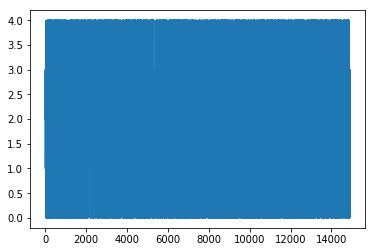

In [133]:
# Computing value prediction matrix
val_pred_matrix = construct_val_pred_matrix(_in, 4)
print(f"Value prediction matrix: \n {val_pred_matrix} {val_pred_matrix.shape}")


# Computing power prediction matrix
pow_pred_matrix = construct_pow_pred_matrix(val_pred_matrix, 4)
print(f"Power prediction matrix: \n {pow_pred_matrix} {pow_pred_matrix.shape}")

plt.plot(pow_pred_matrix[:,0])

Traces matrix: 
 [[-15.       -22.         3.       ...   1.         9.       -26.      ]
 [ -2.        -2.         1.       ...  -1.        -1.       -22.      ]
 [  0.         0.         0.       ...  18.        25.       -26.      ]
 ...
 [  2.5      -17.         9.       ...  -2.8       -5.        -4.      ]
 [ 18.        18.        18.       ...   2.5        3.5      -23.      ]
 [ -3.       -28.666666 -14.5      ...  17.        17.       -23.      ]] (14900, 6990)


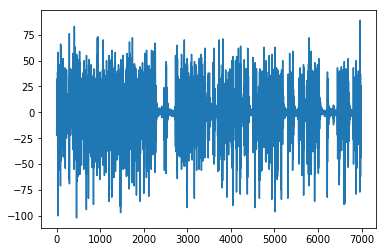

In [25]:
# Opens "traces.mat" file.
trace_file = loadmat('traces.mat')
_traces = trace_file['traces']
print(f"Traces matrix: \n {_traces} {_traces.shape}")

plt.plot(_traces[0])

In [156]:
# Computing correlation matrix
correlations = []
if get_correlation_from_file:
    print("Getting correlation matrix from file.");
    correlations = load_matrix()
else:
    print("Computing correlation matrix.");
    result = correlate_m(pow_pred_matrix, _traces)
    print(result.shape)
    
    
   
    # Sort correlation matrix
    #sorted_correlations = sort_correlation(correlations)
    #print("sorted: {}".format(sorted_correlations))

    # Storing correlations	
    #store_matrix(sorted_correlations)

Computing correlation matrix.
(14900, 16) (14900, 6990)


(16, 6990)


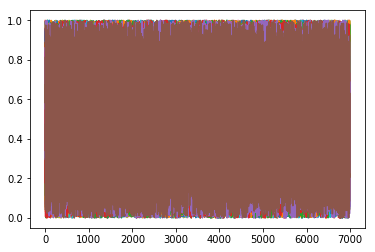

In [158]:
for row in result:
    plt.plot(row)

[1.05016724e-05 1.83417801e-05 1.22146682e-04 ... 9.98959154e-01
 9.99007820e-01 9.99020420e-01]


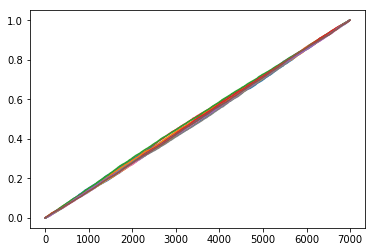

In [164]:
for row in result:
    row = row.sort()
print(result[0][:-2])
for row in result:
    plt.plot(row)

(array([746., 756., 688., 705., 727., 675., 709., 660., 652., 672.]),
 array([1.05016724e-05, 1.00003240e-01, 1.99995979e-01, 2.99988717e-01,
        3.99981456e-01, 4.99974195e-01, 5.99966933e-01, 6.99959672e-01,
        7.99952410e-01, 8.99945149e-01, 9.99937887e-01]),
 <a list of 10 Patch objects>)

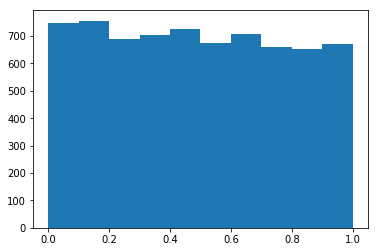

In [160]:
plt.hist(result[0])